In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Phone_Sales_2024.csv')

# Display the first few rows of the dataset
df.head()

,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,dimensions,weight,display_type,...,price_range,os_type,os_version,battery_size,colors_available,chip_company,cpu_core,gpu_company,fingerprint,video_resolution
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,medium price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512.0,8.0,9/20/2024,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),227.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Large,4,Apple,Hexa-core,Apple,Face,4K
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128.0,4.0,11/13/2020,131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in),135.0,"Super Retina XDR OLED, HDR10, Dolby Vision, 62...",...,medium price,iOS,14.1,Small,6,Apple,Hexa-core,Apple,Face,4K


1.Preprocessing

I.Handle missing values and outliers.




In [ ]:
#Identify Missing Values
df.isnull().sum()

,0
phone_brand,0
phone_model,0
store,0
price_usd,0
storage,76
ram,72
launch_date,0
dimensions,0
weight,0
display_type,0


In [ ]:
df.dtypes

,0
phone_brand,object
phone_model,object
store,object
price_usd,float64
storage,float64
ram,float64
launch_date,object
dimensions,object
weight,float64
display_type,object


In [ ]:
# Impute with mean
df['storage'] = df['storage'].fillna(df['storage'].mean())
df['ram'] = df['ram'].fillna(df['ram'].mean())
df['display_size'] = df['display_size'].fillna(df['display_size'].mean())

# Impute with mode
df['display_resolution'] = df['display_resolution'].fillna(df['display_resolution'].mode()[0])
df['cpu_core'] = df['cpu_core'].fillna(df['cpu_core'].mode()[0])
df['gpu_company'] = df['gpu_company'].fillna(df['gpu_company'].mode()[0])


# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

phone_brand           0
phone_model           0
store                 0
price_usd             0
storage               0
ram                   0
launch_date           0
dimensions            0
weight                0
display_type          0
display_size          0
display_resolution    0
os                    0
nfc                   0
usb                   0
battery               0
features_sensors      0
colors                0
video                 0
chipset               0
cpu                   0
gpu                   0
year                  0
foldable              0
ppi_density           0
quantile_10           0
quantile_50           0
quantile_90           0
price_range           0
os_type               0
os_version            0
battery_size          0
colors_available      0
chip_company          0
cpu_core              0
gpu_company           0
fingerprint           0
video_resolution      0
dtype: int64


,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,dimensions,weight,display_type,...,price_range,os_type,os_version,battery_size,colors_available,chip_company,cpu_core,gpu_company,fingerprint,video_resolution
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,medium price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000.0,8.0,9/20/2024,149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in),199.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Medium,4,Apple,Hexa-core,Apple,Face,4K
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512.0,8.0,9/20/2024,163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in),227.0,"LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...",...,high price,iOS,18,Large,4,Apple,Hexa-core,Apple,Face,4K
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128.0,4.0,11/13/2020,131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in),135.0,"Super Retina XDR OLED, HDR10, Dolby Vision, 62...",...,medium price,iOS,14.1,Small,6,Apple,Hexa-core,Apple,Face,4K


In [ ]:
def frequency_encoding(df, columns):
    for col in columns:
        # Calculate frequency of each category
        frequency_map = df[col].value_counts(normalize=True).to_dict()

        # Map frequencies to the original column
        df[col + '_freq_encoded'] = df[col].map(frequency_map)

    # Drop the original categorical columns
    df = df.drop(columns=columns, axis=1)

    return df

# Example usage:
categorical_cols = ['phone_brand','phone_model','store','features_sensors']
df_encoded = frequency_encoding(df, categorical_cols)

print(df_encoded.head())

   price_usd  storage  ram launch_date  \
0    1357.55    256.0  8.0   9/20/2024   
1    1492.55    512.0  8.0   9/20/2024   
2    1705.32   1000.0  8.0   9/20/2024   
3    1564.92    512.0  8.0   9/20/2024   
4     247.32    128.0  4.0  11/13/2020   

                                      dimensions  weight  \
0  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
1  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
2  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
3    163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in)   227.0   
4  131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in)   135.0   

                                        display_type  display_size  \
0  LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...           6.3   
1  LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...           6.3   
2  LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...           6.3   
3  LTPO Super Retina XDR OLED, 120Hz, HDR10, Dolb...           6.9   
4  Super Retina XDR OLED, HDR10, Dol

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_new= df.drop(columns= ['dimensions','weight', 'display_type', 'display_size', 'os', 'nfc', 'usb', 'battery', 'colors', 'video','chipset','cpu','gpu','foldable','ppi_density','quantile_10','quantile_50','quantile_90','battery_size','chip_company','gpu_company','fingerprint','video_resolution'])
label_encoder = LabelEncoder()
df_new.head()

,phone_brand,phone_model,store,price_usd,storage,ram,launch_date,display_resolution,features_sensors,year,price_range,os_type,os_version,colors_available,cpu_core,phone_brand_freq_encoded,phone_model_freq_encoded,store_freq_encoded,features_sensors_freq_encoded
0,apple,Apple iPhone 16 Pro,Amazon DE,1357.55,256.0,8.0,9/20/2024,1206 x 2622,"Face ID, accelerometer, gyro, proximity, compa...",1/1/2024,medium price,iOS,18,4,Hexa-core,0.113583,0.004684,0.340749,0.110656
1,apple,Apple iPhone 16 Pro,Amazon DE,1492.55,512.0,8.0,9/20/2024,1206 x 2622,"Face ID, accelerometer, gyro, proximity, compa...",1/1/2024,high price,iOS,18,4,Hexa-core,0.113583,0.004684,0.340749,0.110656
2,apple,Apple iPhone 16 Pro,Amazon DE,1705.32,1000.0,8.0,9/20/2024,1206 x 2622,"Face ID, accelerometer, gyro, proximity, compa...",1/1/2024,high price,iOS,18,4,Hexa-core,0.113583,0.004684,0.340749,0.110656
3,apple,Apple iPhone 16 Pro Max,Amazon DE,1564.92,512.0,8.0,9/20/2024,1320 x 2868,"Face ID, accelerometer, gyro, proximity, compa...",1/1/2024,high price,iOS,18,4,Hexa-core,0.113583,0.001756,0.340749,0.110656
4,apple,Apple iPhone 12 mini,Amazon DE,247.32,128.0,4.0,11/13/2020,1080 x 2340,"Face ID, accelerometer, gyro, proximity, compa...",1/1/2020,medium price,iOS,14.1,6,Hexa-core,0.113583,0.003513,0.340749,0.110656


In [ ]:
#-------------outlier-------------
columns_num = ['phone_brand','phone_model','store','features_sensors']

def cap_outliers(df_new, columns_num):
    for column in columns_num:
        Q1 = df_new[column].quantile(0.25)
        Q3 = df_new[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df_new[column] = np.where(df_new[column] < lower_bound, lower_bound, df[column])
        df_new[column] = np.where(df_new[column] > upper_bound, upper_bound, df[column])
    return df_new

numeric_columns = df_new.select_dtypes(include=['float64', 'int64']).columns

# Handle outliers
df_cleaned = cap_outliers(df_new, numeric_columns)

print("Cleaned Data:")
print(df_cleaned.describe())

# Calculate the number of outliers using a suitable method. Here's one example:
outlier_count = df_cleaned[numeric_columns][(df_cleaned[numeric_columns] < df_cleaned[numeric_columns].quantile(0.25) - 1.5 * (df_cleaned[numeric_columns].quantile(0.75) - df_cleaned[numeric_columns].quantile(0.25))) | (df_cleaned[numeric_columns] > df_cleaned[numeric_columns].quantile(0.75) + 1.5 * (df_cleaned[numeric_columns].quantile(0.75) - df_cleaned[numeric_columns].quantile(0.25)))].count().sum()

print(f"Number of Outliers: {outlier_count}")

Cleaned Data:
         price_usd      storage          ram  colors_available  \
count  1708.000000  1708.000000  1708.000000       1708.000000   
mean    401.596121   249.082010     7.983040          3.577576   
std     305.751892   142.974289     3.321613          1.091848   
min      52.630000    32.000000     2.000000          1.000000   
25%     167.562500   128.000000     6.000000          3.000000   
50%     278.835000   256.000000     8.000000          3.000000   
75%     550.327500   272.696078    12.000000          4.000000   
max    1124.475000   489.740196    21.000000          5.500000   

       phone_brand_freq_encoded  phone_model_freq_encoded  store_freq_encoded  \
count               1708.000000               1708.000000         1708.000000   
mean                   0.154249                  0.002982            0.272092   
std                    0.099675                  0.001513            0.087057   
min                    0.000585                  0.000585          

II.Scale features using standardization or normalization.

In [ ]:
# Select only numerical features for scaling
numerical_features = df_new.select_dtypes(include=['number']).columns
numerical_df = df_new[numerical_features]

#Standardization (Z-Score Scaling)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(numerical_df)
print("Standardized Data:\n", data_standardized)



Standardized Data:
 [[ 2.36495867  0.04840042  0.00510754 ...  1.12470849  0.78887717
   1.13979411]
 [ 2.36495867  1.68371998  0.00510754 ...  1.12470849  0.78887717
   1.13979411]
 [ 2.36495867  1.68371998  0.00510754 ...  1.12470849  0.78887717
   1.13979411]
 ...
 [-0.78713032 -0.84712763 -0.59718593 ...  0.73772176 -2.48053685
   0.09146112]
 [-0.4414548  -0.84712763  0.00510754 ... -0.42323841 -2.48053685
   0.09146112]
 [ 0.37101027  0.16521141  1.2096945  ... -1.58419858 -2.48053685
   1.37741626]]


III.Perform feature selection.

In [ ]:
# Wrapper Methods (Recursive Feature Elimination)
X = df_new.select_dtypes(include=['number']).drop("price_usd", axis=1)  # Drop target variable
y = df_new["price_usd"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LinearRegression()


rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)



model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"Model R^2 Score with Selected Features: {score:.4f}")

Selected Features: Index(['phone_brand', 'phone_model'], dtype='object')
Model R^2 Score with Selected Features: 0.2598


**2.Build and Evaluate Models**

I.Train a Linear Regression model.

II.Evaluate using R² Score and RMSE.

III.Perform K-Fold Cross-Validation (e.g., 5-fold).

In [ ]:
# Select relevant numerical features and target
features = ['phone_brand','phone_model','store','features_sensors']
target = 'price_usd'

# 1. Train a Linear Regression model.

# Split data into training and testing sets
X = df_new[features]
y = df_new[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coefficients)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define custom scoring metrics
rmse_scorer = make_scorer(mean_squared_error)  # RMSE
r2_scorer = make_scorer(r2_score)  # R² Score

# Perform cross-validation
rmse_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

# Print the results
print(f"Average RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Average R² Score: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Mean Squared Error: 105662.87003624448
R-squared Score: 0.2661842145703768
R² Score: 0.2662
Root Mean Squared Error (RMSE): 325.06
            Feature  Coefficient
0       phone_brand -1600.533221
1       phone_model  1234.708210
2             store   340.363181
3  features_sensors   426.889650
Average RMSE: 95268.34 ± 9543.77
Average R² Score: 0.2679 ± 0.0279


**3.Enhance the Model**

I.Experiment with feature selection techniques and analyze their impact.

II.Visualize results (e.g., feature importance, residual plots).

Univariate Feature Selection
Selected Features: ['phone_brand' 'phone_model' 'store']
R² Score: 0.1545, RMSE: 348.91

Recursive Feature Elimination (RFE)
Selected Features: ['phone_brand' 'phone_model' 'features_sensors']
R² Score: 0.2520, RMSE: 328.18

Feature Importance with Random Forest
Feature Importances:
 phone_brand         0.028071
phone_model         0.547114
store               0.161045
features_sensors    0.263770
dtype: float64
R² Score: 0.2662, RMSE: 325.06



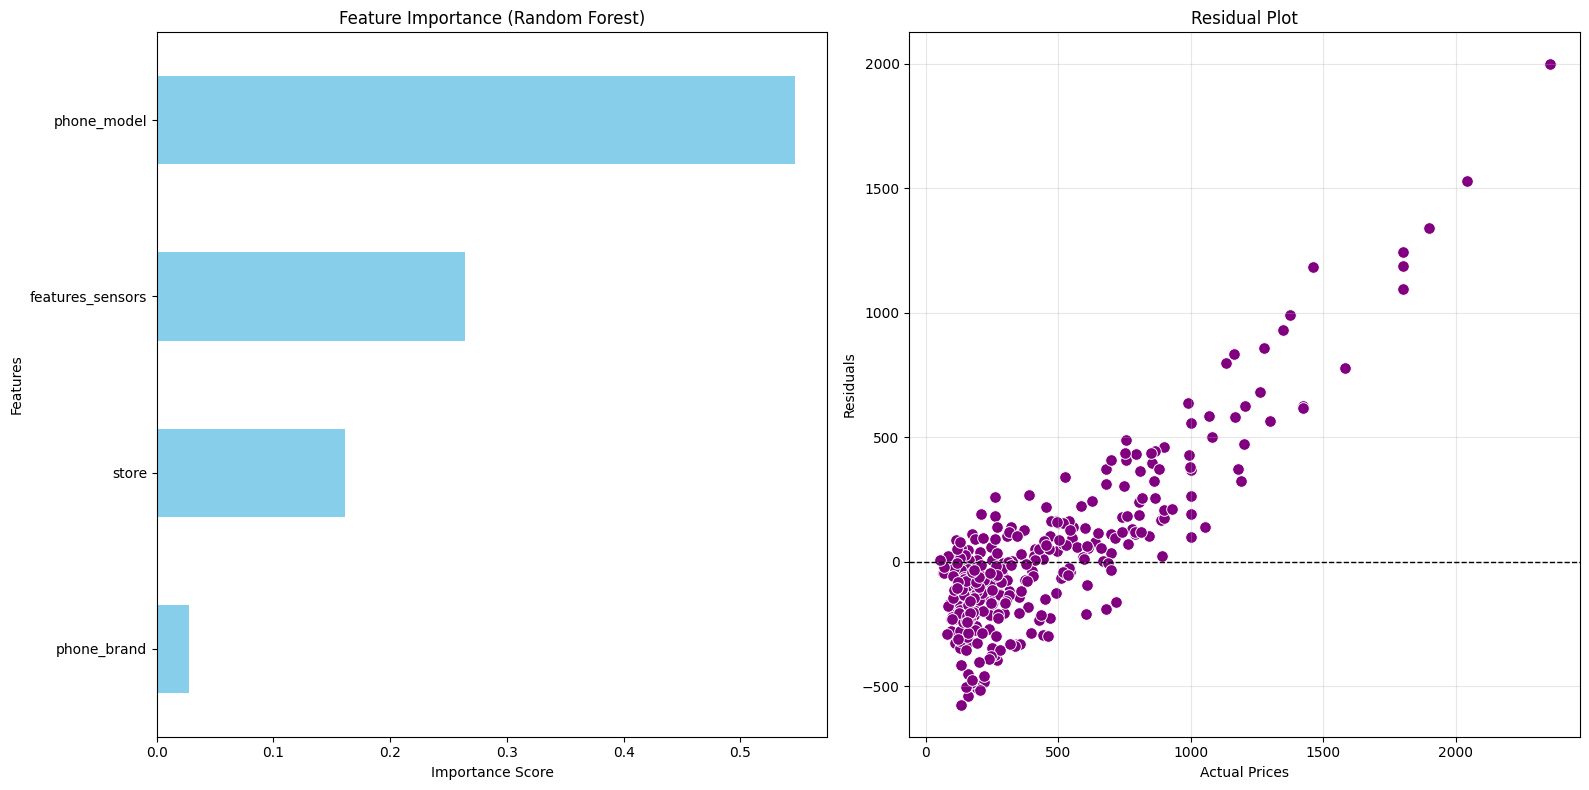

In [ ]:
# 1. Univariate Feature Selection
print("Univariate Feature Selection")
selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X_train, y_train)
selected_features_univariate = np.array(features)[selector.get_support()]
print("Selected Features:", selected_features_univariate)

model.fit(X_new, y_train)
y_pred_univariate = model.predict(selector.transform(X_test))
r2_uni = r2_score(y_test, y_pred_univariate)
rmse_uni = np.sqrt(mean_squared_error(y_test, y_pred_univariate))
print(f"R² Score: {r2_uni:.4f}, RMSE: {rmse_uni:.2f}\n")

# 2. Recursive Feature Elimination (RFE)
print("Recursive Feature Elimination (RFE)")
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_train, y_train)
selected_features_rfe = np.array(features)[rfe.support_]
print("Selected Features:", selected_features_rfe)

y_pred_rfe = rfe.predict(X_test)
r2_rfe = r2_score(y_test, y_pred_rfe)
rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
print(f"R² Score: {r2_rfe:.4f}, RMSE: {rmse_rfe:.2f}\n")

# 3. Feature Importance with Random Forest
print("Feature Importance with Random Forest")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=features)
print("Feature Importances:\n", feature_importances)

# Use top 3 features based on importance
top_features = feature_importances.index
X_train_rf = X_train[top_features]
X_test_rf = X_test[top_features]

model.fit(X_train_rf, y_train)
y_pred_rf = model.predict(X_test_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"R² Score: {r2_rf:.4f}, RMSE: {rmse_rf:.2f}\n")

# Feature Importance (Random Forest)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=features)

# Residual Plot
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Visualization
plt.figure(figsize=(16, 8))

# 1. Feature Importance
plt.subplot(1, 2, 1)
feature_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")

# 2. Residual Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=residuals, color='purple', edgecolor='w', s=70)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Plot")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**4.Creativity**

I.Try advanced models (e.g., Ridge, Lasso, Polynomial).

II.Create insightful visualizations or optimize hyperparameters.



Model Performance Comparison:

Ridge: R² = 0.2658, RMSE = 325.14
Lasso: R² = 0.2658, RMSE = 325.13
Polynomial (degree=2): R² = 0.2861, RMSE = 320.61


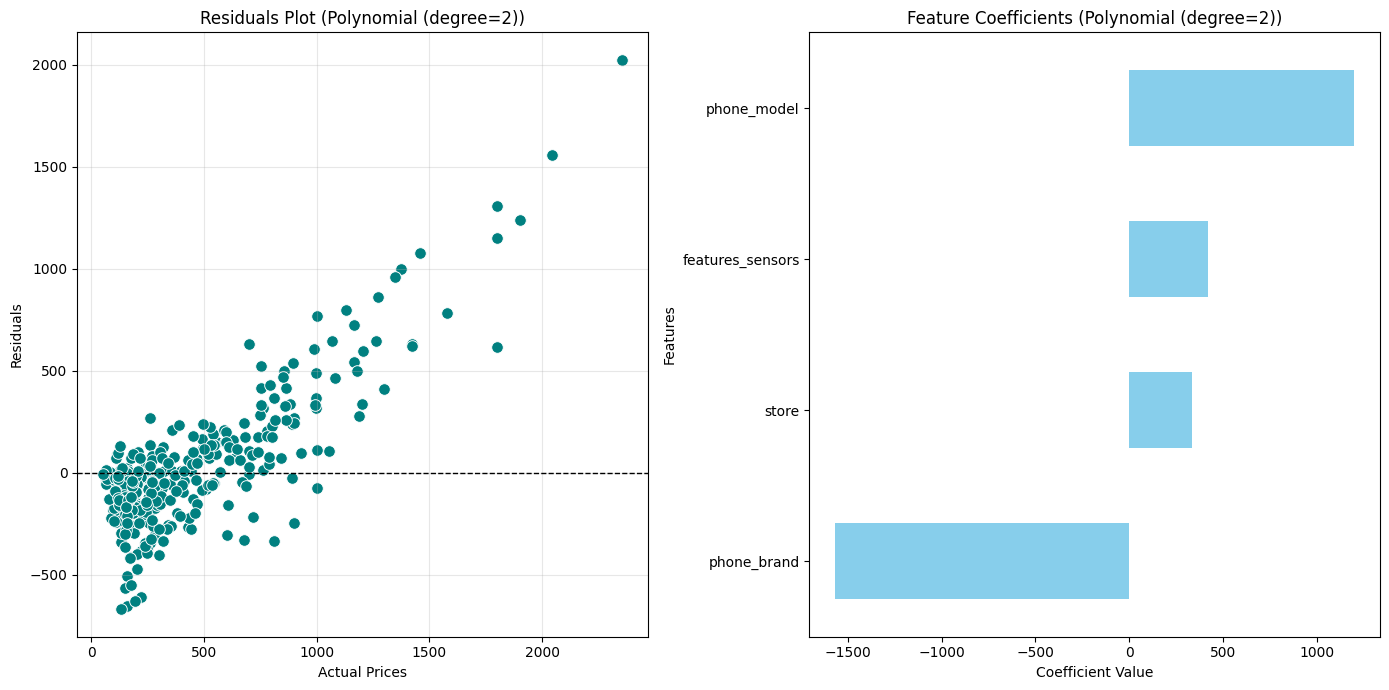


Best Hyperparameters:
Ridge Best Alpha: 0.1
Lasso Best Alpha: 0.1


In [ ]:
# Initialize a results dictionary for comparisons
results = {}

# 1. Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_

y_pred_ridge = ridge_best.predict(X_test)
results['Ridge'] = {
    'R²': r2_score(y_test, y_pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge))
}

# 2. Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_

y_pred_lasso = lasso_best.predict(X_test)
results['Lasso'] = {
    'R²': r2_score(y_test, y_pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso))
}

# 3. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

results['Polynomial (degree=2)'] = {
    'R²': r2_score(y_test, y_pred_poly),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_poly))
}

# Display results
print("\nModel Performance Comparison:\n")
for model, metrics in results.items():
    print(f"{model}: R² = {metrics['R²']:.4f}, RMSE = {metrics['RMSE']:.2f}")

# Visualize Results
plt.figure(figsize=(14, 7))

# Residuals Plot for the Best Model
best_model = max(results, key=lambda x: results[x]['R²'])
if best_model == 'Polynomial (degree=2)':
    residuals = y_test - y_pred_poly
elif best_model == 'Ridge':
    residuals = y_test - y_pred_ridge
else:
    residuals = y_test - y_pred_lasso

# 1. Residuals Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=residuals, color='teal', edgecolor='w', s=70)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title(f"Residuals Plot ({best_model})")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)

# 2. Coefficients Visualization (for Ridge or Lasso)
#if best_model in ['Ridge', 'Lasso']:
coef = pd.Series(ridge_best.coef_ if best_model == 'Ridge' else lasso_best.coef_, index=features)
plt.subplot(1, 2, 2)
coef.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title(f"Feature Coefficients ({best_model})")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")

plt.tight_layout()
plt.show()

# Hyperparameter Summary
print("\nBest Hyperparameters:")
print(f"Ridge Best Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Lasso Best Alpha: {lasso_cv.best_params_['alpha']}")